<a href="https://colab.research.google.com/github/adrien50/basicprojectmachinelearning/blob/main/imageclassificationtensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this article, I am going to explain how we can train a neural network model for the task of image classification with TensorFlow. For those new to TensorFlow, TensorFlow is an end-to-end open-source platform for machine learning. It has a comprehensive and flexible ecosystem of tools, libraries, and community resources that allow researchers to push cutting-edge advancements in ML, and developers to easily build and deploy machine learning-based applications.

###What is Image Classification?
Image classification is the process of categorizing and labelling groups of pixels or vectors in an image according to specific rules. The categorization law can be designed using one or more spectral or textural characteristics.

###Image Classification with TensorFlow
Now, Image Classification can also be done by using less complex models provided by Scikit-Learn, so why TensorFlow. By using TensorFlow we can build a neural network for the task of Image Classification. By building a neural network we can discover more hidden patterns than just classification. Now let’s get started with the task of Image Classification with TensorFlow by importing some necessary packages:

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

###Import the Fashion MNIST dataset
Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the “Hello, World” of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the images of clothing that I will use for the task of image classification with TensorFlow.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In the dataset, each image is mapped into a single label. Since the class names are not defined in the dataset, we need to store them here so that we can use them later when viewing the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###Preprocess The Data
For this task of Image Classification with TensorFlow, the data must be preprocessed before training the neural network. If you inspect the first frame of the training set, you will find that the pixel values ​​are between 0 and 255:

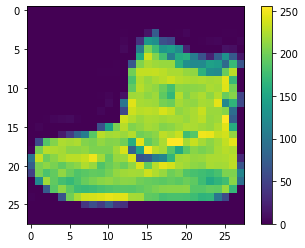

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Now I’m going to scale these values ​​to a range of 0 to 1 before passing them to the neural network model. To do this, we need to divide the values ​​by 255. The training set and the test set should be preprocessed in the same way:

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and to verify that we are ready to create and train the neural network for image classification with TensorFlow, let’s display the first 25 images of the training set and display the name of the class under each image:

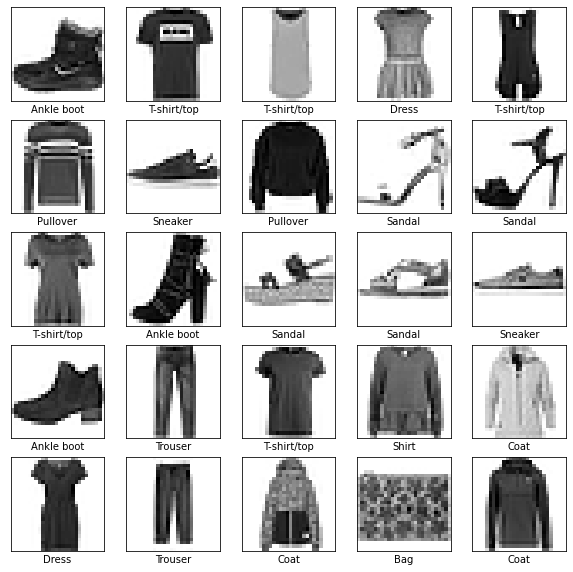

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###Image Classification with TensorFlow: Building Model
Now to Build the neural network for the task of Image Classification with TensorFlow, we first need to configure the model layers and then move forward with compiling the model.

###Setting Up Layers
The basic building block of neural networks is its layers. Layers work by extracting the representations from data fed into them. Most of the deep learning, Models involves doing simple layers together. Now, let’s create the layers of our neural network:

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

###Compiling The Model
Now, let’s move forward with compiling our model:

Image Classification with TensorFlow: Training Model
Now, let’s train the Neural Network for the task of Image Classification with TensorFlow, and make predictions on 

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6342 - accuracy: 0.7781
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3823 - accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3173 - accuracy: 0.8824
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2601 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2434 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [13]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([2.2431866e-06, 3.2342618e-11, 1.1346654e-08, 6.9897976e-11,
       1.7175193e-08, 5.8546331e-04, 4.5915709e-08, 1.6085800e-02,
       4.3399604e-09, 9.8332638e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the “confidence” of the model that the image matches each of the 10 different garments. Let’s see which label has the highest confidence value:

In [14]:
np.argmax(predictions[0])

9

Thus, the model is most convinced that this image is an ankle boot, or class_names [9]. Examination of the test label shows that this classification is correct:

In [15]:
test_labels[0]

9

Now, I will create a helper function to plot our predictions:

In [ ]:
Now, I will create a helper function to plot our predictions:

In [16]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify Predictions

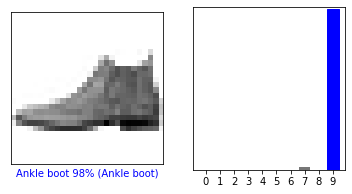

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

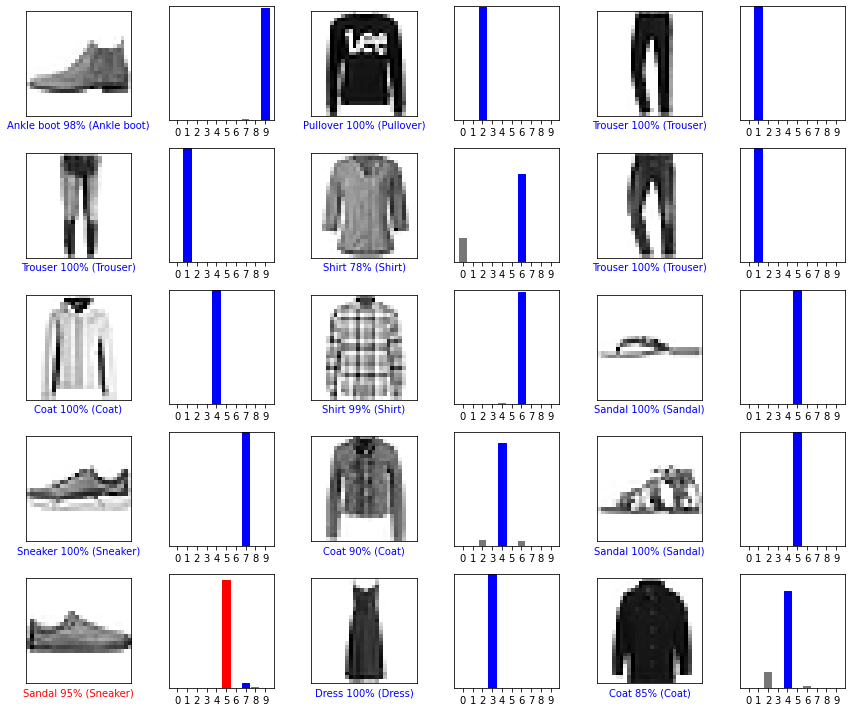

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

The output looks great, only the boots are recognized wrong as sandals. I hope you liked this article on Image. The output looks great, only the boots are recognized wrong as sandals. 